In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.animation as animation
plt.style.use(['dark_background'])

import numpy as np
from scipy.io import loadmat

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import SparsePCA, PCA
from sklearn.preprocessing import MinMaxScaler


In [8]:
chirps1 = np.load(r"C:\Users\zfj\data\100522B\region1_00001\chirps.npy", allow_pickle=True)
chirps2 = np.load(r"C:\Users\zfj\data\100522B\region1_00002\chirps.npy", allow_pickle=True)
chirps = [d1.append(d2) for d1,d2 in zip(chirps1,chirps2)]

C:\Users\zfj\AppData\Local\Temp\ipykernel_6260\805895544.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chirps = [d1.append(d2) for d1,d2 in zip(chirps1,chirps2)]


In [60]:
import GPy
import os

xn_chirp = np.linspace(-2,33,500)[:,None]

resp = np.empty((len(chirps), len(xn_chirp)))
resp_std = np.empty_like(resp)
noise_std = np.empty_like(resp)
mods = np.empty(len(chirps), dtype=object)

for ci in range(len(chirps)):
# for ci in [1]:

    x = chirps[ci]['trial_t'][:,None]
    y = chirps[ci]['dFoF'][:,None]

    m1 = GPy.models.SparseGPRegression(
        x,
        y,
        num_inducing=300,
        kernel = GPy.kern.RBF(1),
    )
    m1.rbf.lengthscale.constrain_bounded(1e-3,1e0)


    m1.optimize_restarts(4, messages=False, max_iters = 20)


    mu1,std1 = m1.predict(xn_chirp, include_likelihood = False)
    resp[ci,:],resp_std[ci,:] = mu1.flatten(), std1.flatten()
    _,std2 = m1.predict(xn_chirp, include_likelihood = True)
    noise_std[ci,:] = std2.flatten()

    mods[ci] = m1

# # # # np.save(os.path.join(bin_path,'..','chirp_mean.npy'), resp)
# # # # np.save(os.path.join(bin_path,'..','chirp_std.npy'), resp_std)
# # # # np.save(os.path.join(bin_path,'..','chirp_noise.npy'), noise_std)


 C:\Users\zfj\AppData\Local\Temp\ipykernel_6260\692045698.py:14: FutureWarning:Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
 C:\Users\zfj\AppData\Local\Temp\ipykernel_6260\692045698.py:15: FutureWarning:Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -20216.508673688466
Optimization restart 2/4, f = -20180.62476123669
Optimization restart 3/4, f = -20180.71670663549
Optimization restart 4/4, f = -20180.859803228846


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -16236.853188308196
Optimization restart 2/4, f = -15870.602986090631
Optimization restart 3/4, f = -15868.615868550818
Optimization restart 4/4, f = -15870.040375876137


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -11807.51773229299
Optimization restart 2/4, f = -11805.215222470253
Optimization restart 3/4, f = -11805.625681237052
Optimization restart 4/4, f = -11805.791967157535


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -24811.028922127793
Optimization restart 2/4, f = -24810.821607187765
Optimization restart 3/4, f = -24809.31331875418
Optimization restart 4/4, f = -24810.10915423316


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -10838.350119440038
Optimization restart 2/4, f = -10800.43745651924
Optimization restart 3/4, f = -10799.133004041305
Optimization restart 4/4, f = -10801.538462765933


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -20956.87674206415
Optimization restart 2/4, f = -20944.500339755046
Optimization restart 3/4, f = -20944.59364502467
Optimization restart 4/4, f = -20944.08989381481


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -11751.100064717668
Optimization restart 2/4, f = -11744.637004249162
Optimization restart 3/4, f = -11745.053706037132
Optimization restart 4/4, f = -11744.449956748593


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -16150.529523829604
Optimization restart 2/4, f = -15749.053090935626
Optimization restart 3/4, f = -15748.50648347407
Optimization restart 4/4, f = -15748.28826377547


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -14568.834654895389
Optimization restart 2/4, f = -13958.367379787587
Optimization restart 3/4, f = -13958.298243479843
Optimization restart 4/4, f = -14044.74231780534


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -18272.75201279775
Optimization restart 2/4, f = -18151.574779109247
Optimization restart 3/4, f = -18147.982357192835
Optimization restart 4/4, f = -18151.181113137583


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -17416.662921690662
Optimization restart 2/4, f = -17385.462463185813
Optimization restart 3/4, f = -17387.892961648347
Optimization restart 4/4, f = -17388.110645106914


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -10160.016206965269
Optimization restart 2/4, f = -10159.448814397467
Optimization restart 3/4, f = -10159.895105922142
Optimization restart 4/4, f = -10160.022562500024


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -16631.371269820153
Optimization restart 2/4, f = -16514.94213023274
Optimization restart 3/4, f = -16515.535821896145
Optimization restart 4/4, f = -16514.960945301194


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -5249.249539077256
Optimization restart 2/4, f = -5073.126623918533
Optimization restart 3/4, f = -5070.806805447857
Optimization restart 4/4, f = -5078.588669829192


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -18140.66470371294
Optimization restart 2/4, f = -17779.420408231068
Optimization restart 3/4, f = -17778.947225809643
Optimization restart 4/4, f = -17778.077104149223


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -17410.282157208945
Optimization restart 2/4, f = -16493.464878661947
Optimization restart 3/4, f = -16494.234866936466
Optimization restart 4/4, f = -16788.48805673819


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -22020.153423252574
Optimization restart 2/4, f = -21710.88874232707
Optimization restart 3/4, f = -21782.680009769785
Optimization restart 4/4, f = -21725.248804395374


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -24403.13302524188
Optimization restart 2/4, f = -24339.803151901062
Optimization restart 3/4, f = -24341.896563952545
Optimization restart 4/4, f = -24338.28444657046


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -17753.760045992774
Optimization restart 2/4, f = -17748.074773457865
Optimization restart 3/4, f = -17748.848309151464
Optimization restart 4/4, f = -17745.709732617146


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -18344.792929921918
Optimization restart 2/4, f = -18342.680757767102
Optimization restart 3/4, f = -18343.95235151243
Optimization restart 4/4, f = -18340.830333157963


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -11892.729309689024
Optimization restart 2/4, f = -11887.38396437194
Optimization restart 3/4, f = -11887.811978443122
Optimization restart 4/4, f = -11887.285496828235


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -19245.30076770848
Optimization restart 2/4, f = -18494.087115987048
Optimization restart 3/4, f = -18506.595380866824
Optimization restart 4/4, f = -18502.90552587571


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -10231.68704738382
Optimization restart 2/4, f = -10228.882123761967
Optimization restart 3/4, f = -10228.846916680926
Optimization restart 4/4, f = -10228.786252950662


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -16944.546551374937
Optimization restart 2/4, f = -16912.01695034641
Optimization restart 3/4, f = -16913.438752482507
Optimization restart 4/4, f = -16909.927343877163


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -19869.67988231064
Optimization restart 2/4, f = -19841.644047101072
Optimization restart 3/4, f = -19838.995893636158
Optimization restart 4/4, f = -19842.128141381883


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -13163.78867914447
Optimization restart 2/4, f = -13120.159765745142
Optimization restart 3/4, f = -13120.89872244593
Optimization restart 4/4, f = -13122.533457573585


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -16343.357637841838
Optimization restart 2/4, f = -16209.011559191553
Optimization restart 3/4, f = -16209.92896830762
Optimization restart 4/4, f = -16209.676268728796


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -20241.485492992295
Optimization restart 2/4, f = -20241.060548109774
Optimization restart 3/4, f = -20241.222798337334
Optimization restart 4/4, f = -20241.26095122651


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -8091.590560255146
Optimization restart 2/4, f = -7992.895975580513
Optimization restart 3/4, f = -7996.035740771071
Optimization restart 4/4, f = -7995.3755758579155


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -26920.596127358578
Optimization restart 2/4, f = -26870.080810689265
Optimization restart 3/4, f = -26865.12474449469
Optimization restart 4/4, f = -26862.551000702326


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -19367.399798282084
Optimization restart 2/4, f = -19253.284333534906
Optimization restart 3/4, f = -19255.1903905318
Optimization restart 4/4, f = -19254.33902964733


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -23906.961953279646
Optimization restart 2/4, f = -23763.410477726084
Optimization restart 3/4, f = -23763.100513455724
Optimization restart 4/4, f = -23762.88149651163


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -6133.723278968208
Optimization restart 2/4, f = -6059.489508596718
Optimization restart 3/4, f = -6061.814327516534
Optimization restart 4/4, f = -6061.959384169454


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -24226.202191086588
Optimization restart 2/4, f = -24203.681842716538
Optimization restart 3/4, f = -24201.127812821826
Optimization restart 4/4, f = -24203.38881355622


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -18872.03428435093
Optimization restart 2/4, f = -18772.66623232703
Optimization restart 3/4, f = -18773.651966669055
Optimization restart 4/4, f = -18773.553562661957


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -14463.71107822072
Optimization restart 2/4, f = -14287.260288198102
Optimization restart 3/4, f = -14286.155363292668
Optimization restart 4/4, f = -14283.651124895086


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -13507.731575920609
Optimization restart 2/4, f = -13415.693672733902
Optimization restart 3/4, f = -13419.459437228123
Optimization restart 4/4, f = -13417.346881993968


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -20896.633813267657
Optimization restart 2/4, f = -20626.379212051932
Optimization restart 3/4, f = -20666.650842781226
Optimization restart 4/4, f = -20615.70348063006


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -14586.050132099306
Optimization restart 2/4, f = -13621.361643676551
Optimization restart 3/4, f = -13630.910108922488
Optimization restart 4/4, f = -13630.729866259275


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -16610.34979151145
Optimization restart 2/4, f = -16597.484192980108
Optimization restart 3/4, f = -16599.197852110472
Optimization restart 4/4, f = -16598.473819471797


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -16759.843236628116
Optimization restart 2/4, f = -16649.837505414136
Optimization restart 3/4, f = -16650.035842952824
Optimization restart 4/4, f = -16649.667194175814


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -9467.079644092266
Optimization restart 2/4, f = -9331.38976410568
Optimization restart 3/4, f = -9331.493952259616
Optimization restart 4/4, f = -9331.292339118683


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -18415.408826626084
Optimization restart 2/4, f = -18035.67770500471
Optimization restart 3/4, f = -18035.82311250716
Optimization restart 4/4, f = -18035.88791607605


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -18045.418891725025
Optimization restart 2/4, f = -17943.14056954765
Optimization restart 3/4, f = -17937.78902064107
Optimization restart 4/4, f = -17944.638625134758


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -14751.797927112519
Optimization restart 2/4, f = -14751.047836053509
Optimization restart 3/4, f = -14750.405066252135
Optimization restart 4/4, f = -14751.108778014968


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -16670.881472860554
Optimization restart 2/4, f = -16646.450341871987
Optimization restart 3/4, f = -16647.702735089435
Optimization restart 4/4, f = -16647.450596775598


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -22983.92090737391
Optimization restart 2/4, f = -22977.579794015342
Optimization restart 3/4, f = -22976.78483941753
Optimization restart 4/4, f = -22977.12754729282


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -11912.66737050597
Optimization restart 2/4, f = -11904.803320885836
Optimization restart 3/4, f = -11904.35986134188
Optimization restart 4/4, f = -11904.785379303976


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -31725.015297040332
Optimization restart 2/4, f = -31689.42208922571
Optimization restart 3/4, f = -31693.35888905469
Optimization restart 4/4, f = -31693.573390655118


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -18414.329950933476
Optimization restart 2/4, f = -18409.199860345507
Optimization restart 3/4, f = -18409.454529780734
Optimization restart 4/4, f = -18398.664616973838


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -14468.357852363342
Optimization restart 2/4, f = -14445.580344316688
Optimization restart 3/4, f = -14445.912462958198
Optimization restart 4/4, f = -14445.482399843258


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -21891.741013176146
Optimization restart 2/4, f = -21887.94641077298
Optimization restart 3/4, f = -21886.4436492891
Optimization restart 4/4, f = -21887.97237487463


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -10292.676513251956
Optimization restart 2/4, f = -10242.213951095086
Optimization restart 3/4, f = -10237.47374190561
Optimization restart 4/4, f = -10256.327632873126


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -10437.131167609301
Optimization restart 2/4, f = -10389.379855833144
Optimization restart 3/4, f = -10388.768533623312
Optimization restart 4/4, f = -10389.530495887908


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -8712.017602589325
Optimization restart 2/4, f = -8711.979715836067
Optimization restart 3/4, f = -8711.855556144947
Optimization restart 4/4, f = -8711.775642356206


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -21566.66233370753
Optimization restart 2/4, f = -21331.322399430777
Optimization restart 3/4, f = -21237.940596737677
Optimization restart 4/4, f = -21331.543310087385


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -16651.491039837772
Optimization restart 2/4, f = -16552.185251740535
Optimization restart 3/4, f = -16552.198223805884
Optimization restart 4/4, f = -16552.41808719207


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -11509.850365518745
Optimization restart 2/4, f = -11501.313115955349
Optimization restart 3/4, f = -11501.397293758146
Optimization restart 4/4, f = -11501.216699766564


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -34683.61035560391
Optimization restart 2/4, f = -34595.04343664026
Optimization restart 3/4, f = -34595.59133102404
Optimization restart 4/4, f = -34595.39220848805


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -8691.507885993413
Optimization restart 2/4, f = -8665.775173520422
Optimization restart 3/4, f = -8665.74334837216
Optimization restart 4/4, f = -8665.062656763906


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -10373.879322854853
Optimization restart 2/4, f = -10224.258693393935
Optimization restart 3/4, f = -10223.664076645118
Optimization restart 4/4, f = -10223.415181833303


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -18893.098639637865
Optimization restart 2/4, f = -18888.005972615654
Optimization restart 3/4, f = -18887.870919011104
Optimization restart 4/4, f = -18887.98876865153


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -17442.44201885526
Optimization restart 2/4, f = -16792.751051838397
Optimization restart 3/4, f = -16792.84780523192
Optimization restart 4/4, f = -16792.911987591993


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -13819.484417615256
Optimization restart 2/4, f = -13805.096617789459
Optimization restart 3/4, f = -13807.332542720917
Optimization restart 4/4, f = -13807.379691026421


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -15332.899156691714
Optimization restart 2/4, f = -15326.073734422951
Optimization restart 3/4, f = -15324.623705261734
Optimization restart 4/4, f = -15326.262605529851


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -20926.323741657285
Optimization restart 2/4, f = -20788.94127078383
Optimization restart 3/4, f = -20788.09454346332
Optimization restart 4/4, f = -20788.131172408714


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -19826.557536919
Optimization restart 2/4, f = -19783.47379300635
Optimization restart 3/4, f = -19798.01630445468
Optimization restart 4/4, f = -19797.955935268077


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -10930.304259025448
Optimization restart 2/4, f = -10920.256597801335
Optimization restart 3/4, f = -10920.245190074504
Optimization restart 4/4, f = -10919.828270247359


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -12417.871841089787
Optimization restart 2/4, f = -12416.290808748208
Optimization restart 3/4, f = -12416.630504366212
Optimization restart 4/4, f = -12414.681580869032


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -14872.391644513373
Optimization restart 2/4, f = -14872.253613674195
Optimization restart 3/4, f = -14872.024848647729
Optimization restart 4/4, f = -14872.290387970572


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -23350.629939904957
Optimization restart 2/4, f = -23349.886781167395
Optimization restart 3/4, f = -23350.326249208523
Optimization restart 4/4, f = -23348.90735534315


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -18360.938256635633
Optimization restart 2/4, f = -18338.22007861042
Optimization restart 3/4, f = -18339.060362214754
Optimization restart 4/4, f = -18338.87946680345


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -14375.830387134803
Optimization restart 2/4, f = -14277.959486868496
Optimization restart 3/4, f = -14278.12587680502
Optimization restart 4/4, f = -14277.718352135196


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -20960.11747110091
Optimization restart 2/4, f = -20958.827246126155
Optimization restart 3/4, f = -20958.945650936414
Optimization restart 4/4, f = -20958.835632640774


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -9089.73184545481
Optimization restart 2/4, f = -8956.810626150957
Optimization restart 3/4, f = -8956.308622828763
Optimization restart 4/4, f = -8954.166553379962


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -9813.716440023201
Optimization restart 2/4, f = -9812.1355721257
Optimization restart 3/4, f = -9812.20117396038
Optimization restart 4/4, f = -9812.079199583639


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -9802.971008028186
Optimization restart 2/4, f = -9788.119518070622
Optimization restart 3/4, f = -9787.90758095859
Optimization restart 4/4, f = -9788.062818140601


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -23645.25365473106
Optimization restart 2/4, f = -23580.41795252358
Optimization restart 3/4, f = -23580.294083114415
Optimization restart 4/4, f = -23579.544636912233


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -9225.395976266002
Optimization restart 2/4, f = -9213.006146958804
Optimization restart 3/4, f = -9213.02318559839
Optimization restart 4/4, f = -9212.049871775082


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -18764.980669728262
Optimization restart 2/4, f = -18471.01235757934
Optimization restart 3/4, f = -18470.886834287536
Optimization restart 4/4, f = -18471.252260791425


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -24783.379119975056
Optimization restart 2/4, f = -24752.016166141624
Optimization restart 3/4, f = -24753.138752324216
Optimization restart 4/4, f = -24740.291365146786


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -15104.748364946741
Optimization restart 2/4, f = -14975.531588509517
Optimization restart 3/4, f = -15008.497929696874
Optimization restart 4/4, f = -14970.409381533818


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -20116.80439300473
Optimization restart 2/4, f = -19394.727110578584
Optimization restart 3/4, f = -19392.91663075756
Optimization restart 4/4, f = -19395.915694398667


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -19191.520176429625
Optimization restart 2/4, f = -16914.34634444408
Optimization restart 3/4, f = -16893.459562058808
Optimization restart 4/4, f = -16916.37902374253


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -23189.557324599704
Optimization restart 2/4, f = -23114.59938977349
Optimization restart 3/4, f = -23107.566174818287
Optimization restart 4/4, f = -23111.81707774319


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -20264.602528885527
Optimization restart 2/4, f = -20222.14138449134
Optimization restart 3/4, f = -20219.504091219205
Optimization restart 4/4, f = -20221.829296740816


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -12693.196001234786
Optimization restart 2/4, f = -12685.413862503161
Optimization restart 3/4, f = -12685.92835887608
Optimization restart 4/4, f = -12685.66973847822


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -23519.312939915068
Optimization restart 2/4, f = -23484.55268163339
Optimization restart 3/4, f = -23484.50377348883
Optimization restart 4/4, f = -23484.677980324806


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -19044.17760282907
Optimization restart 2/4, f = -19041.89634524226
Optimization restart 3/4, f = -19041.640152116677
Optimization restart 4/4, f = -19043.056495250563


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -26919.79227991473
Optimization restart 2/4, f = -26783.333702593703
Optimization restart 3/4, f = -26783.09786852454
Optimization restart 4/4, f = -26781.526302998613


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -18192.078052323053
Optimization restart 2/4, f = -18172.645037961072
Optimization restart 3/4, f = -18173.122461923373
Optimization restart 4/4, f = -18172.84176867352


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -18992.48431725684
Optimization restart 2/4, f = -18991.47747863624
Optimization restart 3/4, f = -18992.219770680877
Optimization restart 4/4, f = -18992.26665729517


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -5234.337356819164
Optimization restart 2/4, f = -5163.9919703954
Optimization restart 3/4, f = -5162.697191342989
Optimization restart 4/4, f = -5163.923113480311


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -16640.93051064872
Optimization restart 2/4, f = -16614.05126037752
Optimization restart 3/4, f = -16613.519512388324
Optimization restart 4/4, f = -16614.097909565142


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -9232.418424016965
Optimization restart 2/4, f = -9158.93033793672
Optimization restart 3/4, f = -9155.773630484124
Optimization restart 4/4, f = -9161.432169799898


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -21032.228413106175
Optimization restart 2/4, f = -20984.386122764663
Optimization restart 3/4, f = -20982.960515066665
Optimization restart 4/4, f = -20984.858837769905


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -24448.45595302965
Optimization restart 2/4, f = -24448.282174432527
Optimization restart 3/4, f = -24448.39480537427
Optimization restart 4/4, f = -24448.267390610858


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -26309.476622446793
Optimization restart 2/4, f = -26329.324945471428
Optimization restart 3/4, f = -26331.1348412983
Optimization restart 4/4, f = -26331.536959364323


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -13464.35093096171
Optimization restart 2/4, f = -13450.563013197248
Optimization restart 3/4, f = -13451.415277909016
Optimization restart 4/4, f = -13451.191131200414


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -20165.817142768134
Optimization restart 2/4, f = -20088.94027558415
Optimization restart 3/4, f = -20092.229644879008
Optimization restart 4/4, f = -20092.363099017435


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -16959.66583198595
Optimization restart 2/4, f = -16897.922762742844
Optimization restart 3/4, f = -16893.790673934145
Optimization restart 4/4, f = -16897.97513478534


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -6856.17107199768
Optimization restart 2/4, f = -6855.980025524684
Optimization restart 3/4, f = -6856.051277699868
Optimization restart 4/4, f = -6854.712552305321


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -21151.931222766838
Optimization restart 2/4, f = -21145.25372608193
Optimization restart 3/4, f = -21144.90947889242
Optimization restart 4/4, f = -21144.194866150166


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -13826.7797471043
Optimization restart 2/4, f = -13810.020275992614
Optimization restart 3/4, f = -13812.583936393477
Optimization restart 4/4, f = -13812.813182511203


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -15401.711943493998
Optimization restart 2/4, f = -15386.484297843359
Optimization restart 3/4, f = -15386.476297742562
Optimization restart 4/4, f = -15386.590941023727


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -8262.85394327779
Optimization restart 2/4, f = -8174.520129559506
Optimization restart 3/4, f = -8174.81782821952
Optimization restart 4/4, f = -8184.468912890779


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -16718.58608334453
Optimization restart 2/4, f = -16709.019667400353
Optimization restart 3/4, f = -16709.381158589673
Optimization restart 4/4, f = -16709.411207046018


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -9794.844135112986
Optimization restart 2/4, f = -9659.529560239773
Optimization restart 3/4, f = -9665.111478550338
Optimization restart 4/4, f = -9663.934298075483


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -9779.280588038624
Optimization restart 2/4, f = -9613.12206445972
Optimization restart 3/4, f = -9612.344485483358
Optimization restart 4/4, f = -9617.93287322358


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -17734.564541634547
Optimization restart 2/4, f = -17720.174075986244
Optimization restart 3/4, f = -17720.762791840803
Optimization restart 4/4, f = -17720.596978454912


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -12465.417841683618
Optimization restart 2/4, f = -11704.823682129232
Optimization restart 3/4, f = -11708.324138393486
Optimization restart 4/4, f = -11708.20873612881


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -16140.521998684335
Optimization restart 2/4, f = -16131.971872366037
Optimization restart 3/4, f = -16131.556140228164
Optimization restart 4/4, f = -16131.396387210592


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -20707.905234169626
Optimization restart 2/4, f = -20361.074373254058
Optimization restart 3/4, f = -20361.542460613993
Optimization restart 4/4, f = -20361.09551827867


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -17326.880905835977
Optimization restart 2/4, f = -16264.446853937921
Optimization restart 3/4, f = -16280.600782689455
Optimization restart 4/4, f = -16263.655695122803


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -17687.715502397266
Optimization restart 2/4, f = -17663.618175104242
Optimization restart 3/4, f = -17663.479798165972
Optimization restart 4/4, f = -17663.170278880345


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -22601.945151805987
Optimization restart 2/4, f = -22523.871578223585
Optimization restart 3/4, f = -22522.56568923234
Optimization restart 4/4, f = -22523.915946819034


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -23683.475283346255
Optimization restart 2/4, f = -23625.705871040347
Optimization restart 3/4, f = -23624.854503676845
Optimization restart 4/4, f = -23625.950075404515


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -16183.809114316711
Optimization restart 2/4, f = -15413.259282090976
Optimization restart 3/4, f = -15094.46976326154
Optimization restart 4/4, f = -15091.841744236794


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -23586.023743092257
Optimization restart 2/4, f = -23412.27170621654
Optimization restart 3/4, f = -23412.03322549195
Optimization restart 4/4, f = -23411.73169538297


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -16167.468856361742
Optimization restart 2/4, f = -12828.308806110177
Optimization restart 3/4, f = -11183.920795909944
Optimization restart 4/4, f = -11175.052595306428


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -9660.618543857963
Optimization restart 2/4, f = -9412.810923117533
Optimization restart 3/4, f = -9410.39961411713
Optimization restart 4/4, f = -9394.860947977859


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -30768.30874228075
Optimization restart 2/4, f = -30750.48485789546
Optimization restart 3/4, f = -30749.843955077962
Optimization restart 4/4, f = -30748.187886745047


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -17869.648876844014
Optimization restart 2/4, f = -17063.62362953428
Optimization restart 3/4, f = -17065.151371682656
Optimization restart 4/4, f = -17063.691016632638


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -13815.373862655852
Optimization restart 2/4, f = -11876.418531944631
Optimization restart 3/4, f = -11875.584946841793
Optimization restart 4/4, f = -11876.467637309566


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -9726.677990696982
Optimization restart 2/4, f = -9689.208836298973
Optimization restart 3/4, f = -9689.494629531993
Optimization restart 4/4, f = -9689.659404420607


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -9312.87567960618
Optimization restart 2/4, f = -9270.48117247911
Optimization restart 3/4, f = -9270.309016272531
Optimization restart 4/4, f = -9270.266051286415


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -11998.006301911193
Optimization restart 2/4, f = -11983.677972092597
Optimization restart 3/4, f = -11983.750264213752
Optimization restart 4/4, f = -11983.712154646473


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -22187.569711463795
Optimization restart 2/4, f = -22154.08332026359
Optimization restart 3/4, f = -22152.310095993686
Optimization restart 4/4, f = -22155.019320903513


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -19162.621246253508
Optimization restart 2/4, f = -19115.99662913488
Optimization restart 3/4, f = -19115.76289266562
Optimization restart 4/4, f = -19116.00536508037


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -10644.9733265493
Optimization restart 2/4, f = -10638.777208316535
Optimization restart 3/4, f = -10638.613175139155
Optimization restart 4/4, f = -10638.326090102024


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -20351.854074077182
Optimization restart 2/4, f = -20320.800579896433
Optimization restart 3/4, f = -20320.766858817908
Optimization restart 4/4, f = -20320.005925163838


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -20772.220469400247
Optimization restart 2/4, f = -20702.62140569725
Optimization restart 3/4, f = -20707.091036854476
Optimization restart 4/4, f = -20703.76660697322


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -19652.745621511178
Optimization restart 2/4, f = -19596.02927236151
Optimization restart 3/4, f = -19595.09195928202
Optimization restart 4/4, f = -19597.517418507647


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -14385.01620808392
Optimization restart 2/4, f = -14357.72359204765
Optimization restart 3/4, f = -14357.684793884047
Optimization restart 4/4, f = -14357.121660747776


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -16805.51753527659
Optimization restart 2/4, f = -16408.980327936
Optimization restart 3/4, f = -16410.10195313557
Optimization restart 4/4, f = -16412.922252778382


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -8451.389360879317
Optimization restart 2/4, f = -8026.418252949999
Optimization restart 3/4, f = -7689.993612620228
Optimization restart 4/4, f = -7515.143677635726


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -10258.746370941739
Optimization restart 2/4, f = -10213.783420769603
Optimization restart 3/4, f = -10213.554042388103
Optimization restart 4/4, f = -10213.540899758029


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -15551.398299326176
Optimization restart 2/4, f = -14745.63438621835
Optimization restart 3/4, f = -14744.033725983565
Optimization restart 4/4, f = -14744.49331435119


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -18779.319669361055
Optimization restart 2/4, f = -18379.50798839786
Optimization restart 3/4, f = -18380.277217549177
Optimization restart 4/4, f = -18380.969904641912


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -10338.937801385238
Optimization restart 2/4, f = -10334.661718177695
Optimization restart 3/4, f = -10334.587812113345
Optimization restart 4/4, f = -10334.534916856606


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -8159.099651866969
Optimization restart 2/4, f = -7980.622427275696
Optimization restart 3/4, f = -7983.357061960104
Optimization restart 4/4, f = -7983.612718213664


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -14671.218401869583
Optimization restart 2/4, f = -14468.328177290417
Optimization restart 3/4, f = -14509.67871508215
Optimization restart 4/4, f = -14411.358416912697


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -25136.923207024392
Optimization restart 2/4, f = -25124.556380841237
Optimization restart 3/4, f = -25124.71474679889
Optimization restart 4/4, f = -25124.029331649104


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -7514.94457344882
Optimization restart 2/4, f = -7514.316961319081
Optimization restart 3/4, f = -7514.3807607152785
Optimization restart 4/4, f = -7514.187002195414


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -19981.045819167284
Optimization restart 2/4, f = -19980.37128680375
Optimization restart 3/4, f = -19977.959182952152
Optimization restart 4/4, f = -19976.614516992344


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -12075.045531466443
Optimization restart 2/4, f = -12071.696146615577
Optimization restart 3/4, f = -12071.204878548133
Optimization restart 4/4, f = -12070.712529256336


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -19459.250224585332
Optimization restart 2/4, f = -19452.208317369677
Optimization restart 3/4, f = -19452.39602180899
Optimization restart 4/4, f = -19452.401162148773


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -17365.85350695411
Optimization restart 2/4, f = -17356.917391993113
Optimization restart 3/4, f = -17364.765778920373
Optimization restart 4/4, f = -17364.53640284885


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -23899.350960915344
Optimization restart 2/4, f = -23445.1907740752
Optimization restart 3/4, f = -23447.453032737965
Optimization restart 4/4, f = -23441.719043283218


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -11313.467231251863
Optimization restart 2/4, f = -11259.763139587636
Optimization restart 3/4, f = -11259.509349833339
Optimization restart 4/4, f = -11258.510684171222


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -24595.617481681522
Optimization restart 2/4, f = -24583.512824355326
Optimization restart 3/4, f = -24583.147095723965
Optimization restart 4/4, f = -24582.464785941476


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -9350.227329746378
Optimization restart 2/4, f = -9323.977476202826
Optimization restart 3/4, f = -9325.368169420404
Optimization restart 4/4, f = -9324.955428654795


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -17582.48397007889
Optimization restart 2/4, f = -17534.10768509866
Optimization restart 3/4, f = -17534.579455508352
Optimization restart 4/4, f = -17538.448225919994


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -14081.539512811345
Optimization restart 2/4, f = -14071.012086871138
Optimization restart 3/4, f = -14069.270371214307
Optimization restart 4/4, f = -14069.804975252027


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -16791.609153117053
Optimization restart 2/4, f = -16768.767446577254
Optimization restart 3/4, f = -16768.962740953248
Optimization restart 4/4, f = -16767.368117073347


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -17802.15817763292
Optimization restart 2/4, f = -17797.775240701456
Optimization restart 3/4, f = -17797.953887329448
Optimization restart 4/4, f = -17795.40498956458


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -13312.163067026928
Optimization restart 2/4, f = -13304.238145506659
Optimization restart 3/4, f = -13304.376307927792
Optimization restart 4/4, f = -13302.140036429608


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -10698.045141299432
Optimization restart 2/4, f = -10697.66148157167
Optimization restart 3/4, f = -10697.634278519752
Optimization restart 4/4, f = -10697.602301068293


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -15984.898523473952
Optimization restart 2/4, f = -15428.528172626637
Optimization restart 3/4, f = -15427.594648242442
Optimization restart 4/4, f = -15423.897910213745


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -18160.270612062126
Optimization restart 2/4, f = -18034.355275009228
Optimization restart 3/4, f = -18034.735145632323
Optimization restart 4/4, f = -18034.199152450365


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -21086.168561122704
Optimization restart 2/4, f = -21069.840852601326
Optimization restart 3/4, f = -21070.75554752486
Optimization restart 4/4, f = -21069.462641305217


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -12648.509428980158
Optimization restart 2/4, f = -12618.085694084682
Optimization restart 3/4, f = -12618.043929601676
Optimization restart 4/4, f = -12617.952329103542


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -18409.333963997477
Optimization restart 2/4, f = -18403.290493068693
Optimization restart 3/4, f = -18403.76615633236
Optimization restart 4/4, f = -18404.29316064467


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -17835.2699108655
Optimization restart 2/4, f = -17821.343586133178
Optimization restart 3/4, f = -17822.69984459961
Optimization restart 4/4, f = -17821.10677712276


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -16962.70839316332
Optimization restart 2/4, f = -16917.774971092163
Optimization restart 3/4, f = -16918.179262783182
Optimization restart 4/4, f = -16918.06791027513


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -19117.563795734666
Optimization restart 2/4, f = -19112.667712856513
Optimization restart 3/4, f = -19113.332787605494
Optimization restart 4/4, f = -19107.473701886


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -17889.132125883698
Optimization restart 2/4, f = -17741.616889122553
Optimization restart 3/4, f = -17710.079078710198
Optimization restart 4/4, f = -17740.650818681333


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -22145.897933457272
Optimization restart 2/4, f = -21732.10067404217
Optimization restart 3/4, f = -21731.903329098688
Optimization restart 4/4, f = -21730.98457589308


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -21536.981694998078
Optimization restart 2/4, f = -21486.904855766137
Optimization restart 3/4, f = -21502.416847135068
Optimization restart 4/4, f = -21501.816517112842


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -32230.44206358847
Optimization restart 2/4, f = -32168.9841383196
Optimization restart 3/4, f = -32168.98301603321
Optimization restart 4/4, f = -32169.204386255395


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -11654.242311107753
Optimization restart 2/4, f = -11653.139309305818
Optimization restart 3/4, f = -11652.993315879377
Optimization restart 4/4, f = -11653.18953480411


reconstraining parameters sparse_gp.rbf.lengthscale


Optimization restart 1/4, f = -15688.91646272814
Optimization restart 2/4, f = -15685.47367875936
Optimization restart 3/4, f = -15688.042678252901
Optimization restart 4/4, f = -15688.097295048272


In [61]:
# np.save(os.path.join(bin_path,'chirp_smooth_constrained.npy'), data_smooth)

np.save(os.path.join(r"C:\Users\zfj\data\081122B\func",'chirp_mean_const.npy'), resp)
np.save(os.path.join(r"C:\Users\zfj\data\081122B\func",'chirp_std_const.npy'), resp_std)
np.save(os.path.join(r"C:\Users\zfj\data\081122B\func",'chirp_noise_const.npy'), noise_std)
np.save(os.path.join(r"C:\Users\zfj\data\081122B\func",'chirp_models_const.npy'), mods, allow_pickle=True)


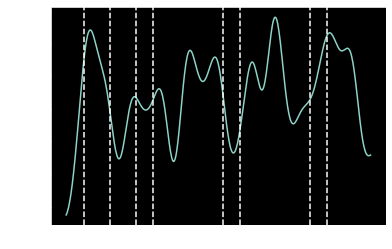

In [103]:
plt.plot(xn_chirp, resp[0])

for x in [0,3,6,8,16,18,26,28]:
    plt.axvline(x,0,1, linestyle='--')


# np.zeros(2*sf), #pre time
#         np.ones(3*sf), #positive step
#         np.zeros(3*sf), #negative time
#         np.ones(2*sf) * 0.5, #inter time
        
#         -np.sin(2*np.pi*np.linspace(0,8/sf,sf*8).cumsum() + np.pi)/2 + .5, # freq chirp


#         np.ones(2*sf) * 0.5, #inter time
#         -np.linspace(0,1,sf*8)*np.sin(2*np.pi*2*np.linspace(1/sf, 8, sf*8) + np.pi)/2 + .5, # amp chirp

#         np.ones(2*sf) * 0.5, #inter time
#         np.zeros(5*sf), #tail time

(500, 172)
(172, 500)


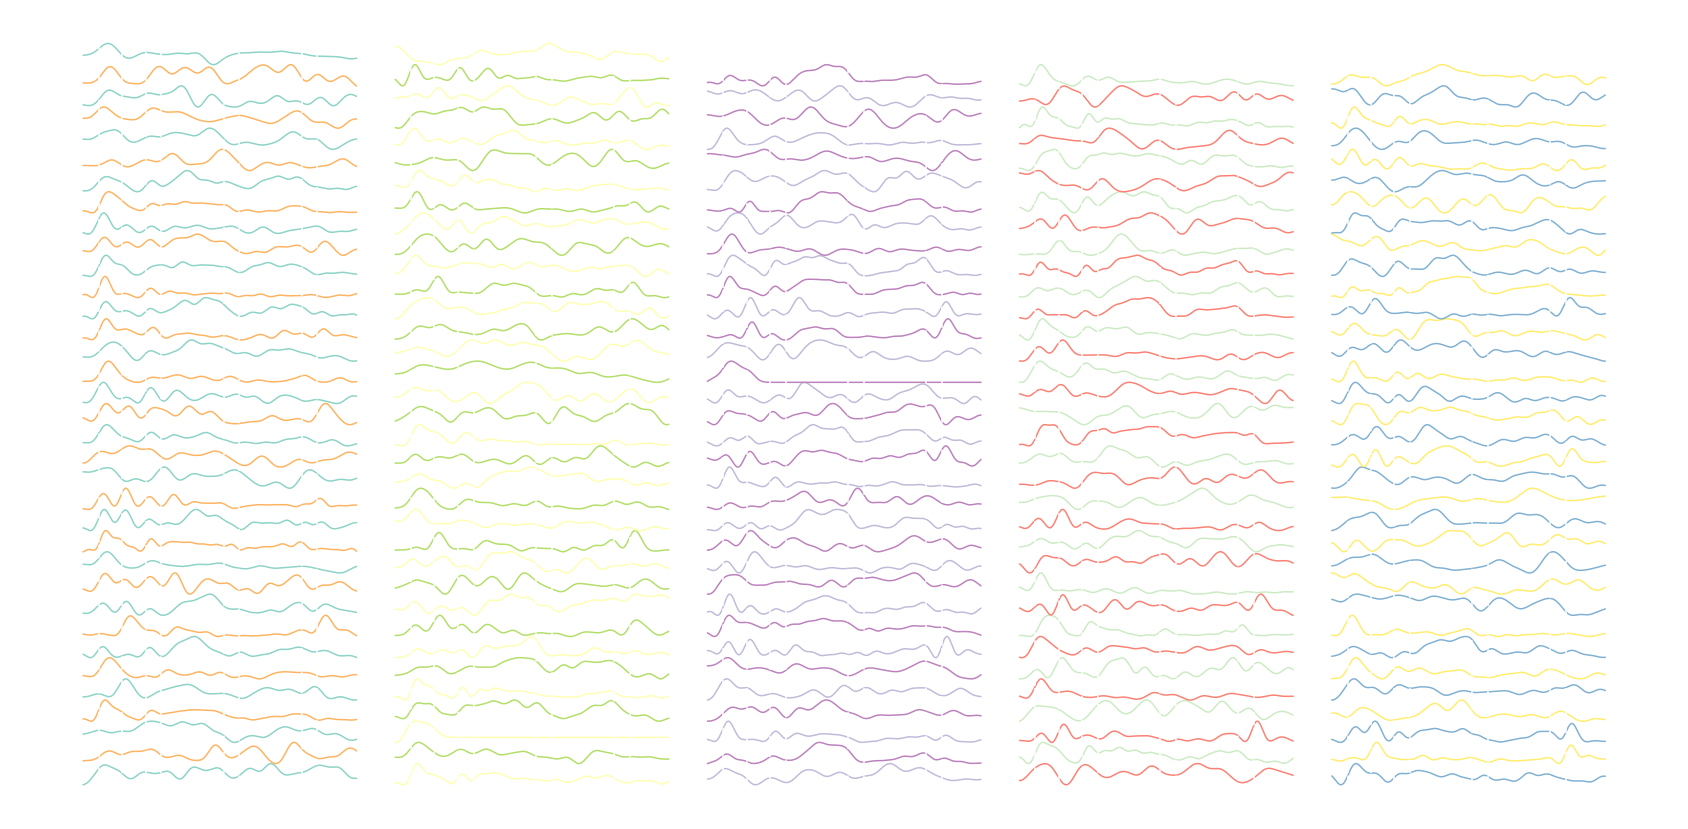

In [116]:
xspacing = 40

plt.figure(figsize=(30,15))
x = np.arange(5) * xspacing
y = np.arange(35)
X,Y = np.meshgrid(x,y)



respn = resp.T
respn = respn - respn.min(axis=0)
respn = respn / respn.max(axis=0)


print((X.flatten()[:172] + xn_chirp).shape)
print((Y.flatten()[:172,None] + resp).shape)
plt.plot(X.flatten()[:172] + xn_chirp,Y.flatten()[None,:172] + respn)
plt.axis('off')


for j in range(5):
    for x in [0,3,6,8,16,18,26,28]:
        plt.axvline(x + j*xspacing,.05,.95, linestyle='--')
    if j>0:
        plt.axvline(j*xspacing - 2 - (xspacing-35)/2,.05,.95)

plt.show()



Name : sparse_gp
Objective : -16183.790177625606
Number of Parameters : 303
Number of Optimization Parameters : 303
Updates : True
Parameters:
  sparse_gp.               |                 value  |  constraints  |  priors
  inducing_inputs          |              (300, 1)  |               |        
  rbf.variance             |  0.019638570842389114  |      +ve      |        
  rbf.lengthscale          |    2.3260634212827647  |      +ve      |        
  Gaussian_noise.variance  |  0.009440447775932295  |      +ve      |        


 C:\Users\zfj\AppData\Local\Temp\ipykernel_6260\3757487961.py:7: FutureWarning:Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


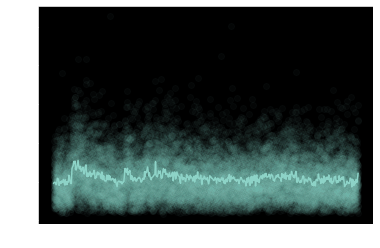

In [28]:
print(m1)
# plt.plot(xn_chirp, resp[66,:])
x,y  = chirps[1]['trial_t'],chirps[1]['dFoF']
plt.scatter(x,y, alpha=.03)

from scipy.interpolate import RBFInterpolator
spline = lambda x,y: RBFInterpolator(x[:,None],y,smoothing=0.05)

sm = spline(x,y)(xn_chirp)

plt.plot(xn_chirp, sm)

In [37]:
# preds = np.zeros((len(xn_chirp), 5))
# preds[:,-1] = resp[1]
# preds[:,-2] = m1.predict(xn_chirp, include_likelihood = False)[0].flatten()
ls = [.1, .2, .5, 1.0, 2.326]

In [59]:
# m1.param_array.shape
m1

(-0.025, 0.1)

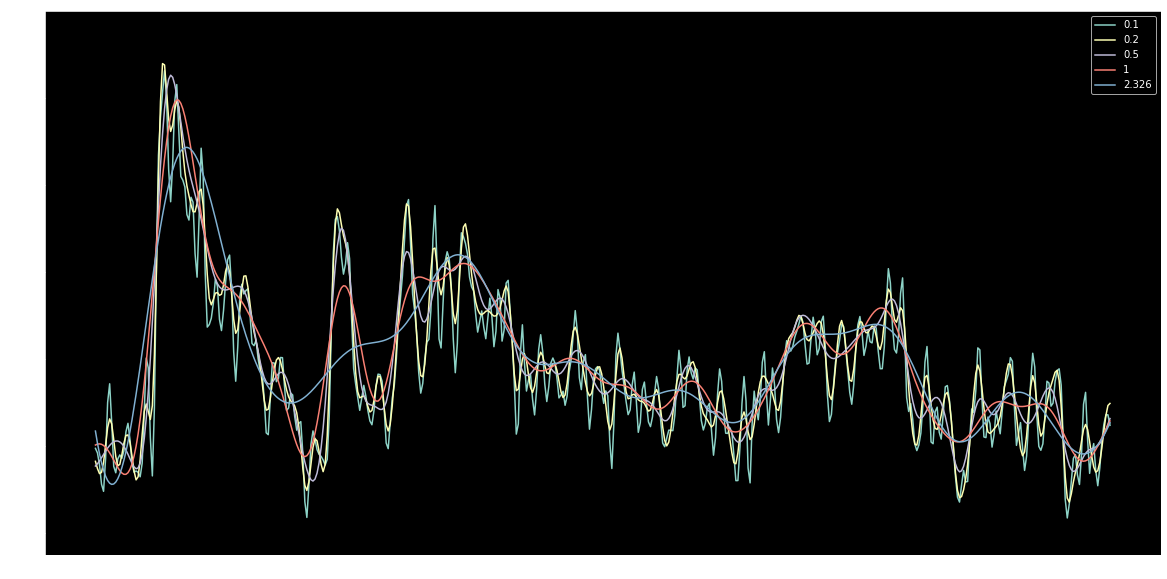

In [51]:
plt.figure(figsize=(20,10))

plt.plot(xn_chirp, preds)
plt.legend(ls)

# plt.scatter(x,y, alpha=.05)

plt.ylim(-.025,.1)

In [50]:
m1.rbf.lengthscale.constrain_fixed(0.2)
m1.optimize_restarts(4, messages=False, max_iters = 20)
preds[:,1] = m1.predict(xn_chirp, include_likelihood = False)[0].flatten()

m1.rbf.lengthscale.constrain_fixed(0.1)
m1.optimize_restarts(4, messages=False, max_iters = 20)
preds[:,0] = m1.predict(xn_chirp, include_likelihood = False)[0].flatten()


Optimization restart 1/4, f = -16198.6612147956
Optimization restart 2/4, f = -15810.596071628612
Optimization restart 3/4, f = -15807.474360083914
Optimization restart 4/4, f = -15809.791699723166
Optimization restart 1/4, f = -16133.593027943267
Optimization restart 2/4, f = -15760.169410096354
Optimization restart 3/4, f = -15753.058672804886
Optimization restart 4/4, f = -15756.979170870007


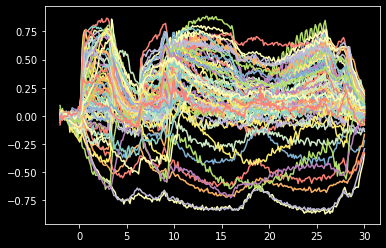

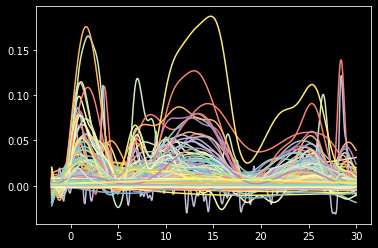

In [96]:
M = loadmat("BadenEtAl_RGCs_2016_v1.mat")
ci = M['cluster_idx'].flatten() - 1
# print(np.unique(ci))
# l = np.argsort(ci)
# CA = M['chirp_avg'][:,l]
clust_avg = np.array([M['chirp_avg'][:, ci==i].mean(axis=1) for i in range(ci.max())])
# print(clust_avg.shape)

# plt.figure()
# plt.plot(np.linspace(0, 33, 31988),M['chirp_stim']/256, color='k')
plt.plot(np.linspace(-2, 30, 249), clust_avg.T)
# plt.show()

plt.figure()
plt.plot(t[:457],chirp.T[:457,:])
plt.show()

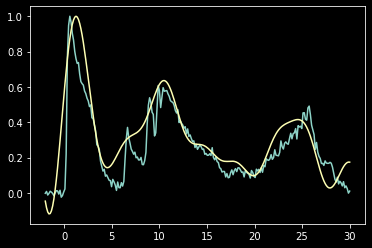

In [143]:
cli = 29
ci = 1
plt.plot(np.linspace(-2, 30, 249), clust_avg[cli] / clust_avg[cli].max())
plt.plot(np.linspace(-2, 30, 249),chirp_rs[ci] / chirp_rs[ci].max())

In [6]:
print(t[0],t[-1], chirp[0,:].shape, t.flatten().shape, t[:,0].shape, len(chirp))
# np.interp(np.linspace(-2,30,249), t.flatten(), chirp)
chirp_rs = np.asarray([np.interp(np.linspace(-2,30,249), t[:,0], chirp[i,:]) for i in range(len(chirp))])

print(chirp_rs.shape)
# print(chirp[0].shape,t.shape)

[-2.] [33.] (500,) (500,) (500,) 172
(172, 249)


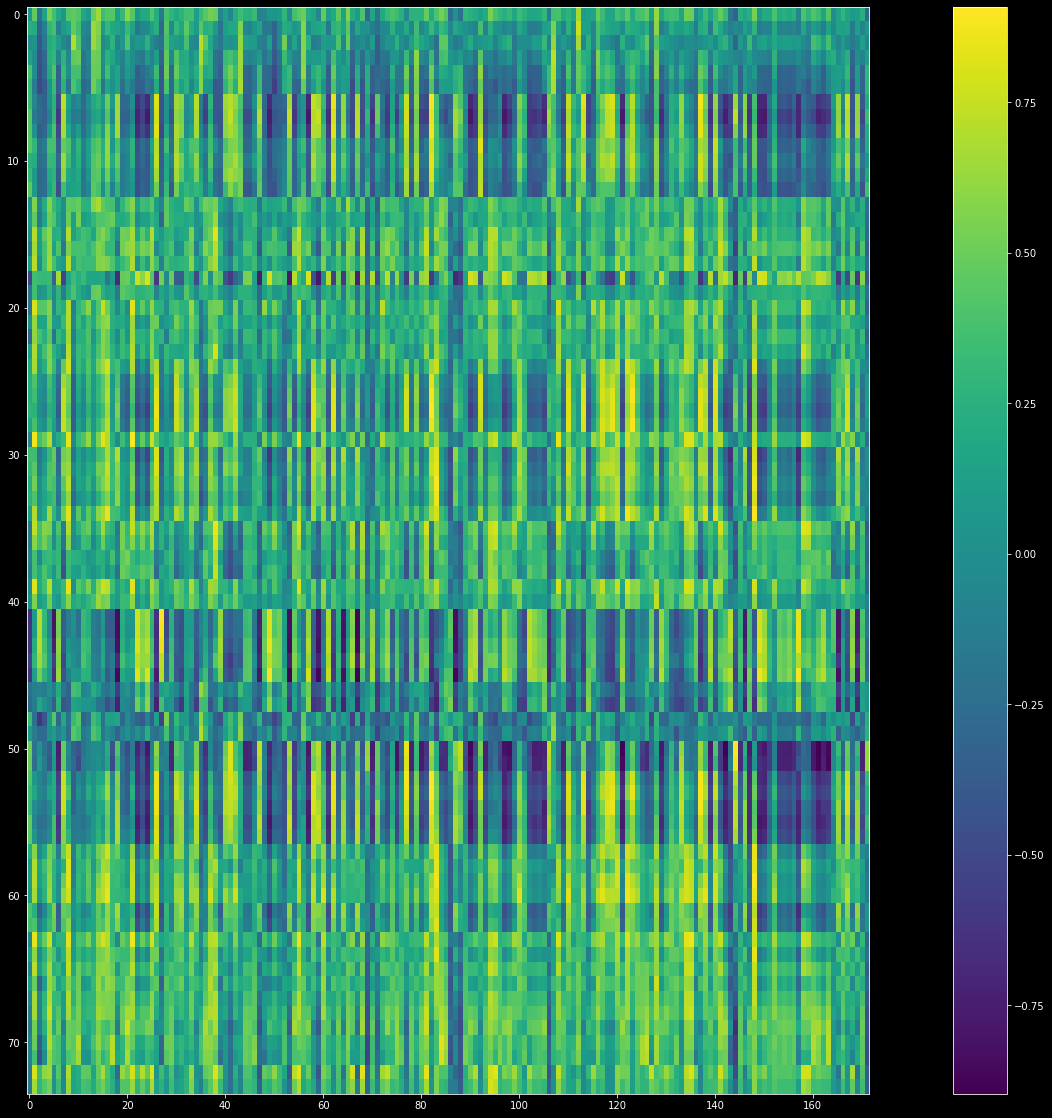

In [117]:
# chirp[:,2::2].shape
plt.figure(figsize=(30,20))
plt.imshow(np.asarray([[np.corrcoef(i, j) for i in chirp_rs] for j in clust_avg])[:,:,0,1], interpolation='nearest', aspect=3)
plt.colorbar()
# np.corrcoef(chirp[1,2::2], clust_avg[0])

(74, 172)


Text(0.5, 1.0, 'Correlation with Baden clusters')

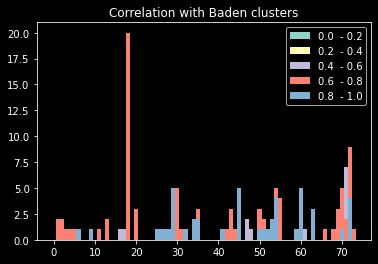

In [118]:
clust_corr = np.asarray([[np.corrcoef(i, j) for i in chirp_rs] for j in clust_avg])[:,:,0,1]
clust_match = np.argmax(clust_corr, axis=0)

match_corr = np.asarray([clust_corr[clust_match[k],k] for k in range(len(clust_match))])

print(clust_corr.shape)
# plt.hist(clust_match,np.arange(len(clust_avg)))
# plt.figure()
# plt.plot([clust_corr[clust_match[k],k] for k in range(len(clust_match))])
# plt.show()
# last_corr = np.zeros(len(clust_avg))
for i in range(5):
    # print(i)
    ii = np.argwhere(np.logical_and(match_corr>=i/5, match_corr<(i+1)/5))
    # print(ii)

    plt.hist(clust_match[ii], bins=np.arange(len(clust_avg)+1)-.5, stacked=True)[0]

plt.legend([f"{i/5:0.1f}  - {i/5 + .2:0.1f}" for i in range(5)])
plt.title("Correlation with Baden clusters")


In [142]:
clust_match[:5]

array([50, 29, 43, 72, 68], dtype=int64)

(172, 249)


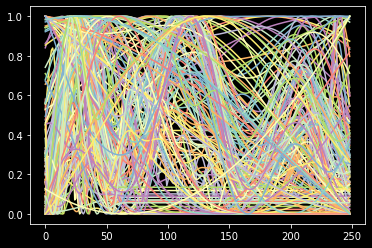

In [163]:
print(chirp_rs.shape)
plt.plot(MinMaxScaler().fit_transform(chirp_rs.T))
plt.show()

In [185]:
print(M.keys())

dict_keys(['__header__', '__version__', '__globals__', 'ans', 'noise_time', 'noise_trace', 'noise_stim', 'cluster_idx', 'group_idx', 'c2g', 'sel_idx', 'cell_dsi', 'cell_dp', 'cell_osi', 'cell_op', 'cell_area', 'cell_volume', 'cell_id', 'cell_oo_idx', 'cell_ff_idx', 'chirp_avg', 'chirp_byrepeat', 'chirp_time', 'chirp_stim', 'chirp_stim_time', 'chirp_qi', 'chirp_scaling', 'bar_byrepeat', 'bar_tc', 'bar_qi', 'bar_time', 'rf_tc', 'rf_time', 'rf_qi', 'rf_size', 'rf_map', 'rf_gauss_mean', 'rf_gauss_std', 'color_avg', 'color_byrepeat', 'color_time', 'color_qi', 'immuno_gad', 'immuno_chat', 'immuno_smi', 'immuno_melanopsin', 'genetics_pv', 'genetics_pcp', 'structural', 'rois', 'offsets'])


{'U_init': None, 'V_init': None, 'alpha': 0.1, 'max_iter': 1000, 'method': 'lars', 'n_components': 20, 'n_jobs': None, 'random_state': None, 'ridge_alpha': 0.01, 'tol': 1e-08, 'verbose': False} (20, 500)


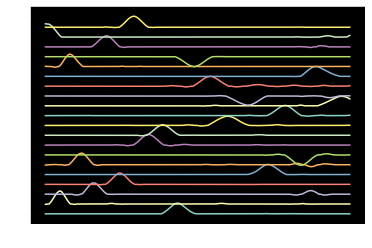

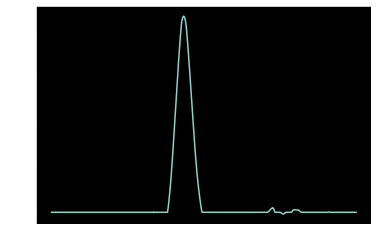

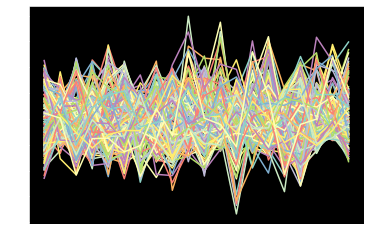

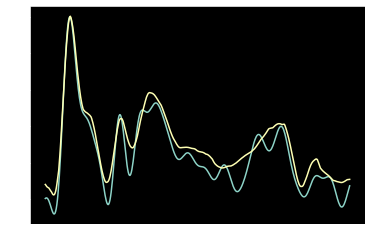

In [89]:
chirp_rs = resp

pca = SparsePCA(n_components=20, alpha=1e-1)
# X_trans = spca.transform(X)
# inverse = (X_trans @ spca.components_) + spca.mean_

# pca = PCA(n_components=20)
pca.fit(MinMaxScaler().fit_transform(chirp_rs.T).T)
# pca.inverse_transform = lambda X: (pca.transform(X) @ pca.components_) + pca.mean_
pca.inverse_transform = lambda X: (X @ pca.components_) + pca.mean_

print(pca.get_params(), pca.components_.shape)

plt.plot(pca.components_.T + np.arange(20)*.2)
plt.figure()

plt.plot(pca.components_[0])
plt.figure()
plt.plot(pca.transform(MinMaxScaler().fit_transform(chirp_rs.T).T).T)


plt.figure()
plt.plot(chirp_rs[1] / chirp_rs[1].max())
plt.plot(pca.inverse_transform(pca.transform(MinMaxScaler().fit_transform(chirp_rs.T).T))[1])

plt.show()


 c:\Users\zfj\anaconda3\envs\suite2p\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


[12 11 35 12 11 31 14 17  2 10 14 11 23 10 21 11  1 18 26 17 21 11 35  3
 14 11  1 28 37 11  8 17 10 35 17 10 10  2 11 23 18 13 25 21 36 14 20 30
 23 27 11 18 10 13 28 11 10 10 25 12  4 23 17  9 37  9 11 22 29 13 15 25
 23 22 30 33 14 21 37 18 11 11  5  1 37 21  6  1 13  2 23 15 37  4 11 11
 24  0 11 23  2 32  8  9 24 11 18 21 11  8  2 30 10 17 10 23 21  2 17 17
  2 14  2  2  8 18 15 11  9 37  3 35 15 25  2 11  3 17  2 14  2 11 30 34
  4 20 39 16  1  3 14  8  8  7 11 14 38 19 11 23  7 21 33 39  8  1 35 17
 23 25 35 22]


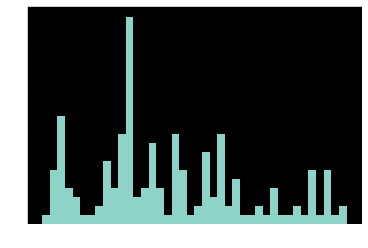

In [90]:
mod = GaussianMixture(n_components = 40, covariance_type='diag', reg_covar=1e-5)

clusts = mod.fit_predict(pca.transform(MinMaxScaler().fit_transform(chirp_rs.T).T))

plt.hist(clusts, bins=np.arange(mod.n_components + 1)-.5)
print(clusts)

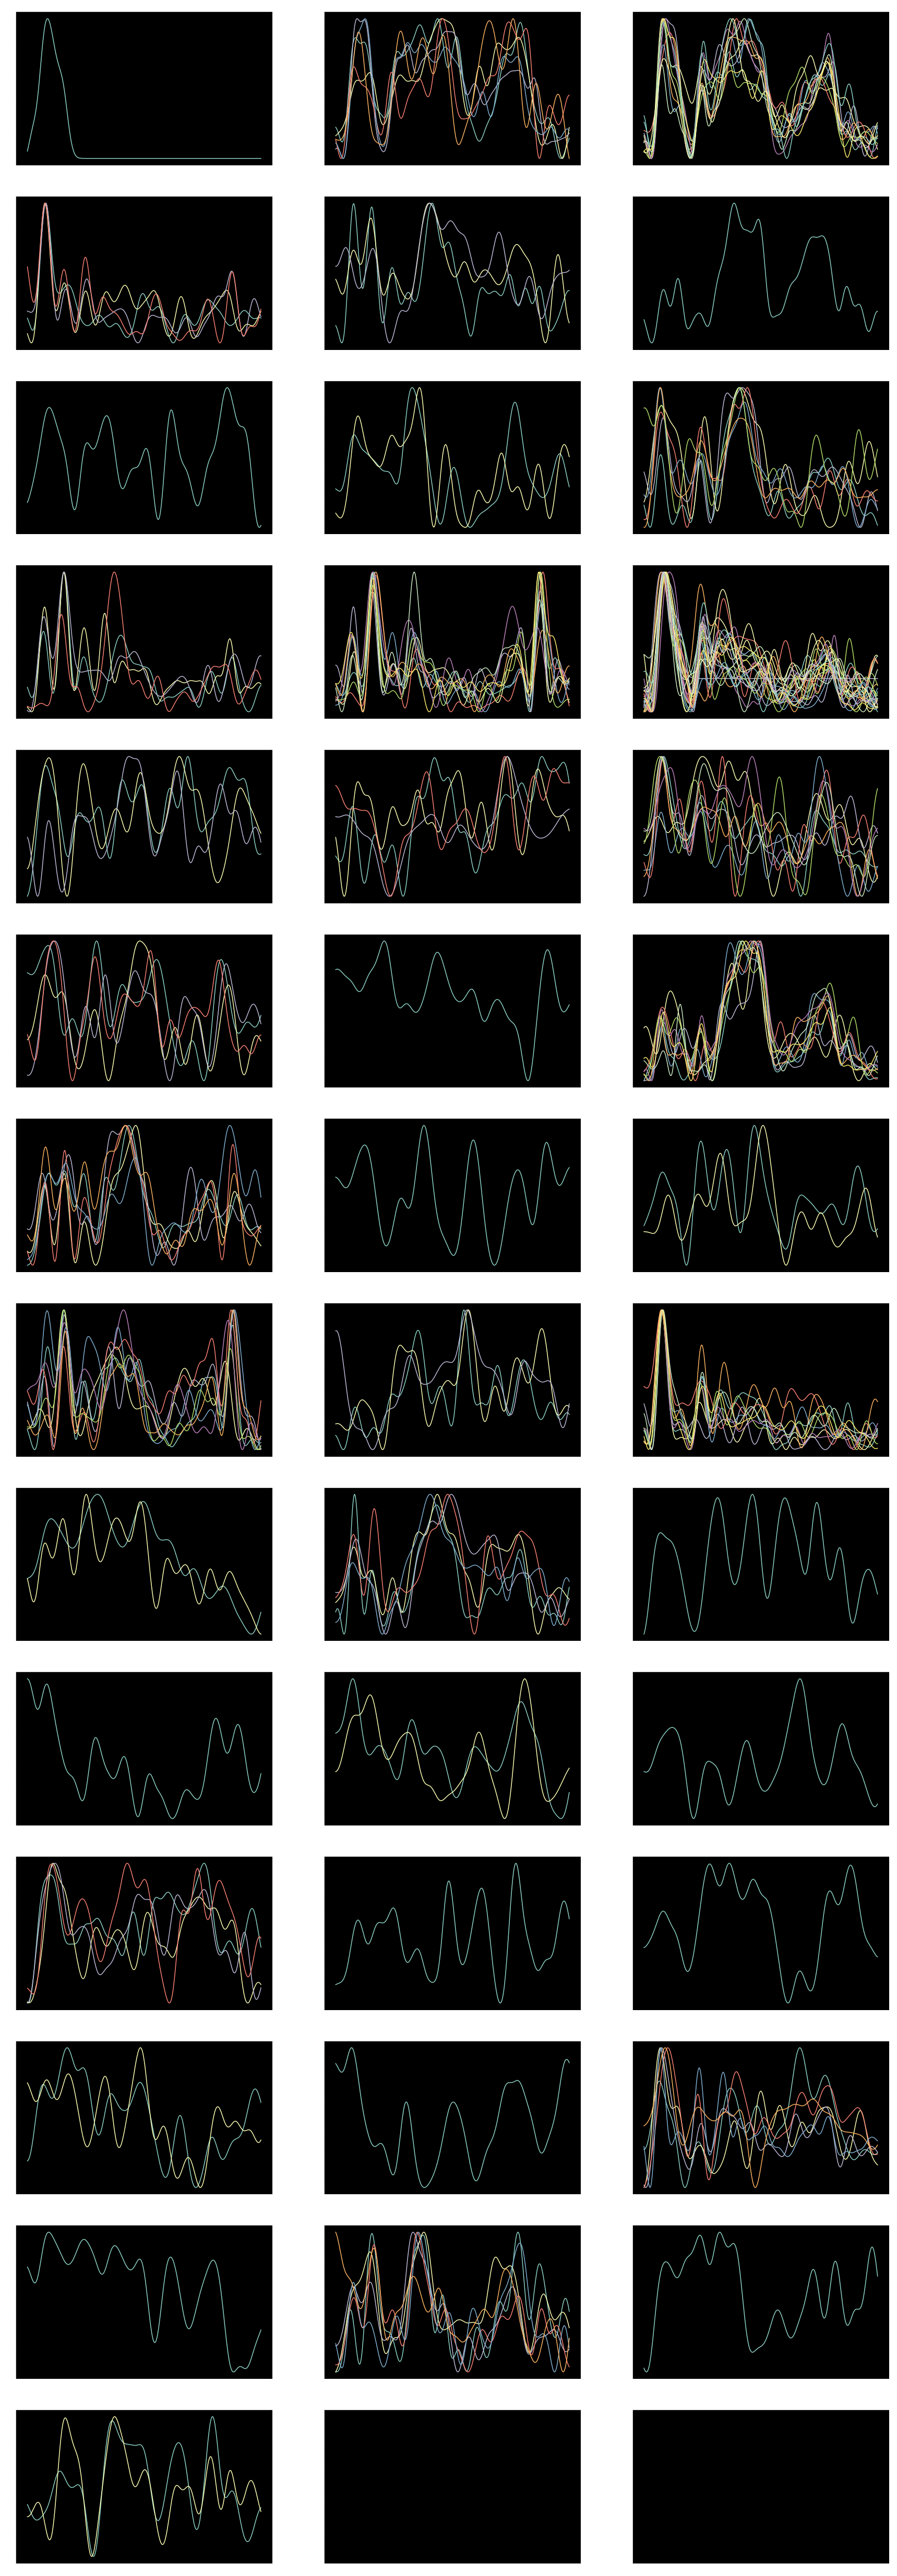

In [91]:
axs = plt.subplots(mod.n_components//3 + 1,3,figsize=(30,90))[1].flatten()
for i in range(mod.n_components):
    ch = chirp_rs[clusts==i,:]
    ch = ch - ch.min(axis=1, keepdims=True)
    ch = ch / ch.max(axis=1, keepdims=True)
    axs[i].plot(ch.T)
    axs[i].set_title(f"Cluster {i} ({len(ch)} cells)")
plt.show()

In [9]:
import suite2p
mask_file = r"C:\Users\zfj\data\100522B\region1_masks.tif"
mask = suite2p.io.tiff.open_tiff(mask_file, True)[0].pages[0].asarray()
mask_id = [1, 4, 5, 14, 15, 17, 19, 20, 21, 22, 23, 24, 27, 28, 30, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 156, 159, 160, 161, 162, 166, 168, 169, 173, 174, 188, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219]

# plt.imshow(np.sum(mask == i for i in [60, 139, 141, 145]))

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


In [11]:
# 
# lines[0].get_color()
import matplotlib.colors as colors
colors.hex2color("#00aa00")

# plt.Text.get_fontsize()


(0.0, 0.6666666666666666, 0.0)

In [3]:
clusts = np.array([
  0, 37,  9, 57, 24, 55,  2, 16,  1, 19, 15, 57, 47,  3, 44, 37, 24, 49, 10, 40, 25, 37, 12, 11,
 21, 37, 27, 56, 55, 39, 16, 27,  3, 70, 52, 65, 59,  4, 48, 11, 52,  5,  6, 29, 39, 39, 17, 18,
 11, 12, 47, 68, 62, 18,  7, 37, 43, 21, 27, 18,  4,  2, 71, 25, 10, 38,  7, 10,  7, 50,  2, 22,
 51,  7, 41, 32, 17,  5, 39, 69,  8, 14, 71, 63, 33, 59, 31,  0, 13, 17, 20,  7, 54,  8, 67, 37,
 17, 53, 32, 47, 27, 17,  7,  2,  8, 21, 18, 23, 37,  8, 27, 46, 60, 64, 26, 51, 42,  6, 52,  6,
 70, 20,  1,  6, 58, 49, 33, 11, 34,  2, 67, 41, 46, 66, 24, 37, 11, 64, 27,  2, 27, 30, 20, 31,
 36, 39, 10, 35, 63, 12, 53, 39, 58,  8,  8,  8, 39, 28, 30, 37, 32, 20,  2, 72, 45, 10, 61, 64,
 11, 10,  8, 50,])

In [1]:
# from turtle import color
# plt.Color.translate("#8dd3c7")

clus = [1, 24, 30, 47, 63]
# plt.style.reload_library()

plt.rcParams['text.usetex'] = False



# axs = plt.subplots(mod.n_components//3 + 1,6,figsize=(30,90))[1].flatten()
# m = np.empty(mask.shape)

for i in clus:
    axs = plt.subplots(1,2, figsize = (20,5), gridspec_kw={'width_ratios':(2,1)})[1]
    cli = np.argwhere(clusts==i).flatten()
    print(cli)
    
    ch = chirp_rs[cli,:]
    ch = ch - ch.min(axis=1, keepdims=True)
    ch = ch / ch.max(axis=1, keepdims=True)
    lines = axs[0].plot(np.linspace(-2, 30, 249),ch.T)
    # axs[0].set_title(f"Cluster {i} ({len(ch)} cells)")
    axs[0].set_yticks([0,1])
    # axs[0].set_yticklabels(['MIN ΔF/F', 'MAX ΔF/F'])
    
    axs[0].set_yticklabels(['',''])

    if i == 63:
        axs[0].set_xlabel("Time (s)", fontsize=34)
        # axs[0].set_xticks(np.arange(0,32,5),labelsize=72)
        for tick in axs[0].xaxis.get_major_ticks():
            tick.label.set_fontsize(18)
    else:
        axs[0].set_xticklabels(['' for _ in axs[0].xaxis.get_major_ticks()])

    axs[0].tick_params(length=15, direction='inout')
    axs[0].set_xlim([-2,30])

    # m[:] = 0
    for j,l in zip(cli, lines):
        # m[mask==mask_id[j]]
        # plt.imshow(mask, alpha=1, colo)
        axs[1].imshow(
            mask==mask_id[j], 
            alpha=(mask==mask_id[j]).astype(float), 
            cmap=LinearSegmentedColormap.from_list(l.get_color(), [(0,0,0), colors.hex2color(l.get_color())])
        )

    # axs[2*(i+1) - 1].set_title(f"Cluster {i} ({len(cli)} cells)")
    axs[1].set_xticks([])
    axs[1].set_yticks([])
    # plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

[  1  15  21  25  55  95 108 135 159]


C:\Users\zfj\AppData\Local\Temp\ipykernel_20264\4266647458.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(['' for _ in axs[0].xaxis.get_major_ticks()])


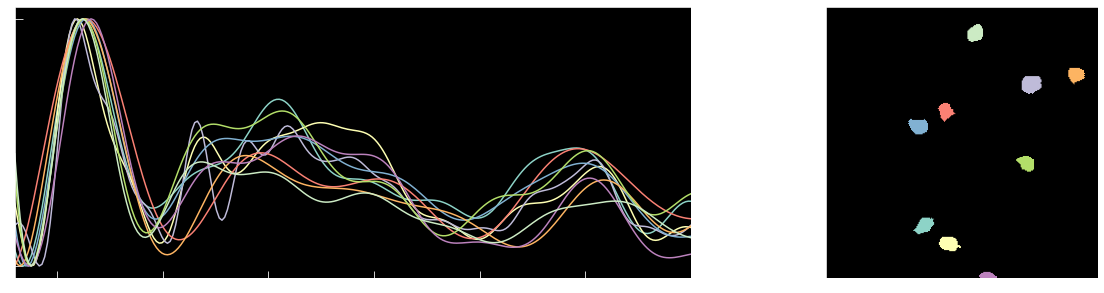

In [13]:
clus = [37]
# from turtle import color
# plt.Color.translate("#8dd3c7")
# plt.style.reload_library()


plt.rcParams['text.usetex'] = False



# axs = plt.subplots(mod.n_components//3 + 1,6,figsize=(30,90))[1].flatten()
# m = np.empty(mask.shape)

for i in clus:
    axs = plt.subplots(1,2, figsize = (20,5), gridspec_kw={'width_ratios':(2,1)})[1]
    cli = np.argwhere(clusts==i).flatten()
    print(cli)
    
    ch = chirp_rs[cli,:]
    ch = ch - ch.min(axis=1, keepdims=True)
    ch = ch / ch.max(axis=1, keepdims=True)
    lines = axs[0].plot(np.linspace(-2, 30, 249),ch.T)
    # axs[0].set_title(f"Cluster {i} ({len(ch)} cells)")
    axs[0].set_yticks([0,1])
    # axs[0].set_yticklabels(['MIN ΔF/F', 'MAX ΔF/F'])
    
    axs[0].set_yticklabels(['',''])

    if i == 63:
        axs[0].set_xlabel("Time (s)", fontsize=34)
        # axs[0].set_xticks(np.arange(0,32,5),labelsize=72)
        for tick in axs[0].xaxis.get_major_ticks():
            tick.label.set_fontsize(18)
    else:
        axs[0].set_xticklabels(['' for _ in axs[0].xaxis.get_major_ticks()])

    axs[0].tick_params(length=15, direction='inout')
    axs[0].set_xlim([-2,30])

    # m[:] = 0
    for j,l in zip(cli, lines):
        # m[mask==mask_id[j]]
        # plt.imshow(mask, alpha=1, colo)
        axs[1].imshow(
            mask==mask_id[j], 
            alpha=(mask==mask_id[j]).astype(float), 
            cmap=LinearSegmentedColormap.from_list(l.get_color(), [(0,0,0), colors.hex2color(l.get_color())])
        )

    # axs[2*(i+1) - 1].set_title(f"Cluster {i} ({len(cli)} cells)")
    axs[1].set_xticks([])
    axs[1].set_yticks([])
    # plt.tight_layout()
plt.show()